In [1]:
import pandas as pd
import numpy as np

# ========================================
# BLOQUE 1: LECTURA Y CARGA DE DATOS
# ========================================

print("="*70)
print("BLOQUE 1: LECTURA Y CARGA DE DATOS")
print("="*70)

from google.colab import drive
drive.mount('/content/drive')

ZIP_PATH = "/content/drive/My Drive/tpredio.csv.0625.zip"
CSV_ENCODING = "utf-8"

import os, zipfile, io, pandas as pd, numpy as np, matplotlib.pyplot as plt

# Verificar que el archivo existe
print("Verificando archivo...")
assert os.path.exists(ZIP_PATH), f"No se encuentra el archivo: {ZIP_PATH}"
print("Archivo encontrado")

# Leer el archivo desde el ZIP
print("Abriendo archivo ZIP...")
with zipfile.ZipFile(ZIP_PATH, 'r') as zf:
    members = [m for m in zf.namelist() if m.lower().endswith(".csv")]
    assert members, "El zip no contiene ningún .csv"
    csv_member = members[0]
    print(f"Leyendo: {csv_member}")
    with zf.open(csv_member) as f:
        df = pd.read_csv(f, low_memory=False, encoding=CSV_ENCODING)

# Información básica del dataset cargado
print(f"Dataset cargado exitosamente!")
print(f"Shape del archivo: {df.shape}")
print(f"Número de columnas: {len(df.columns)}")
print(f"Columnas: {list(df.columns)}")

print("\nPrimeras 3 filas del dataset:")
print("-" * 100)
with pd.option_context('display.max_columns', None, 'display.width', 100):
    print(df.head(3).to_string())

print(f"\nBLOQUE 1 COMPLETADO - Dataset 'df' listo para análisis")
print("="*70)

BLOQUE 1: LECTURA Y CARGA DE DATOS
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Verificando archivo...
Archivo encontrado
Abriendo archivo ZIP...
Leyendo: TPREDIO.csv
Dataset cargado exitosamente!
Shape del archivo: (3768698, 51)
Número de columnas: 51
Columnas: ['PRECBARRIO', 'PRENBARRIO', 'PRECMANZ', 'PRECPREDIO', 'PRECCONS', 'PRECRESTO', 'PRECHIP', 'PRECEDCATA', 'PRENUPRE', 'PRETPROP', 'PREFINCORP', 'PRECLASE', 'PREDIRECC', 'PREMDIRECC', 'PRETDIRECC', 'PREDSI', 'PREATERRE', 'PREACONST', 'PRECZHF', 'PRECDESTIN', 'PREVETUSTZ', 'PREVFORMA', 'PREVACTUAL', 'PRECUSO', 'PREAUSO', 'PREUSOPH', 'PREUSONPH', 'PREUVIVIEN', 'PREUCALIF', 'PREFCALIF', 'PREEARMAZ', 'PREEMUROS', 'PREECUBIER', 'PREECONS', 'PREAFACHAD', 'PREACUBIER', 'PREAPISOS', 'PREACONS', 'PREBTAMANO', 'PREBENCHAP', 'PREBMOBILI', 'PREBCONS', 'PRECTAMANO', 'PRECENCHAP', 'PRECMOBILI', 'PRECCONSE', 'PRECINDUS', 'PREACERCHA', 'PRECLCONS', 'BARMANPRE', '


BLOQUE 2: ANÁLISIS Y CONTEO ESTADÍSTICO
Iniciando análisis estadístico de valores nulos...
TABLA COMPLETA DE ESTADÍSTICAS DE NULOS:
------------------------------------------------------------------------------------------------------------------------
   Columna Tipo_Dato  Total_Valores  Valores_Nulos  Valores_Completos % Nulos % Completos  Únicos_Total  Únicos_NoNulos      Categoría
PREACERCHA   float64        3768698        2679696            1089002  71.10%      28.90%             6               6      ❌ Crítica
 PRECINDUS   float64        3768698        2638501            1130197  70.01%      29.99%             6               6      ❌ Crítica
    PREDSI    object        3768698        2599265            1169433  68.97%      31.03%        664886          664886      ❌ Crítica
PRETDIRECC    object        3768698        2599240            1169458  68.97%      31.03%             2               2      ❌ Crítica
 PRECCONSE   float64        3768698        1161986            2606712  

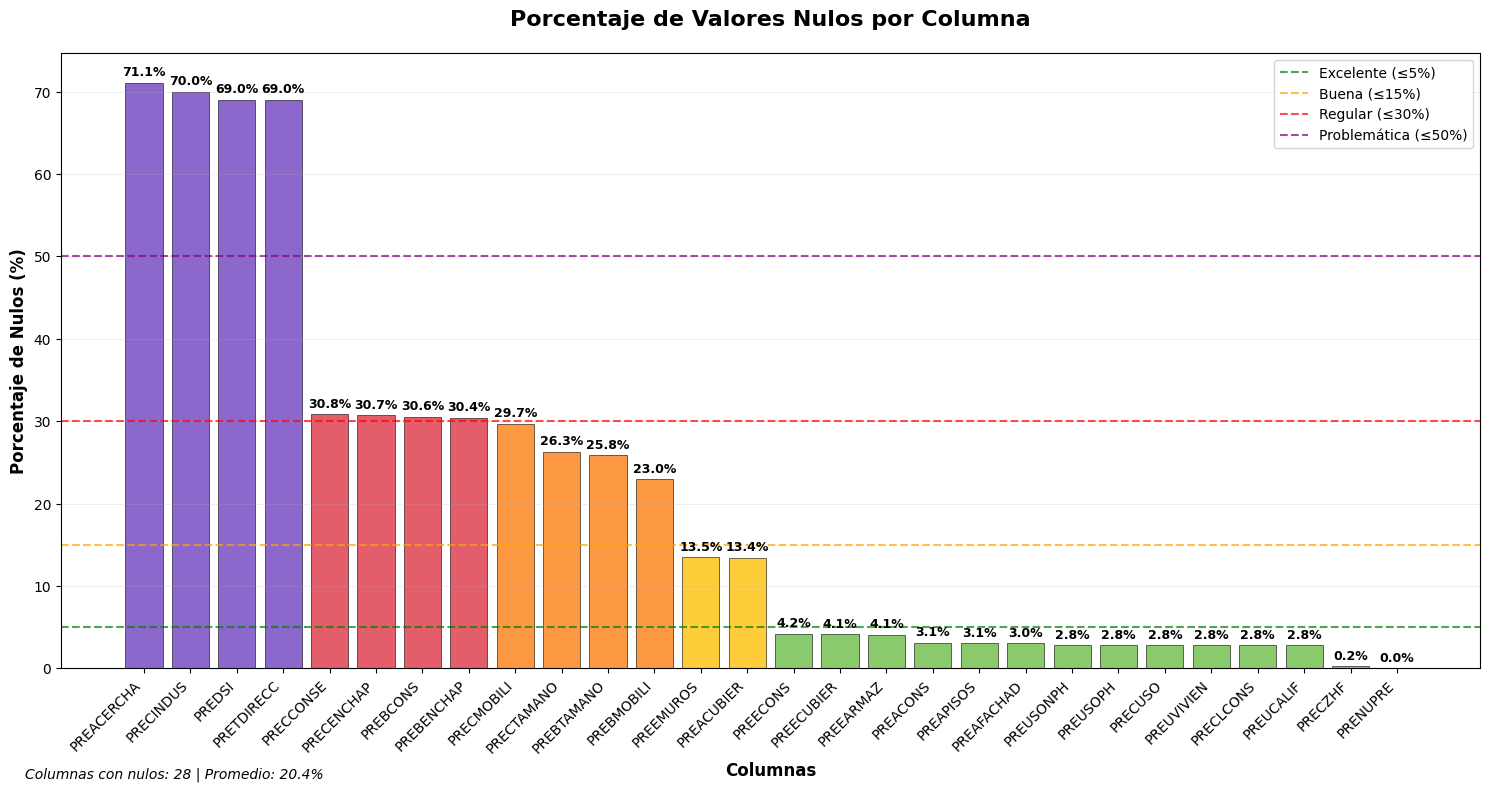

Gráfica generada con 28 columnas que tienen valores nulos

BLOQUE 2 COMPLETADO - Análisis estadístico finalizado


In [2]:
# ========================================
# BLOQUE 2: ANÁLISIS Y CONTEO ESTADÍSTICO
# ========================================

print("\n" + "="*70)
print("BLOQUE 2: ANÁLISIS Y CONTEO ESTADÍSTICO")
print("="*70)

print("Iniciando análisis estadístico de valores nulos...")

# Crear tabla completa de estadísticas de nulos
estadisticas_nulos = []

for columna in df.columns:
    # Estadísticas básicas
    total_valores = len(df)
    valores_nulos = df[columna].isnull().sum()
    valores_no_nulos = df[columna].notna().sum()
    porcentaje_nulos = (valores_nulos / total_valores) * 100
    porcentaje_completos = (valores_no_nulos / total_valores) * 100

    # Tipo de dato
    tipo_dato = str(df[columna].dtype)

    # Valores únicos (solo para los no nulos)
    valores_unicos = df[columna].nunique()
    valores_unicos_no_nulos = df[columna].dropna().nunique()

    # Clasificación por porcentaje de nulos
    if porcentaje_nulos == 0:
        categoria_limpieza = "✅ Completa"
    elif porcentaje_nulos <= 5:
        categoria_limpieza = "🟢 Excelente"
    elif porcentaje_nulos <= 15:
        categoria_limpieza = "🟡 Buena"
    elif porcentaje_nulos <= 30:
        categoria_limpieza = "🟠 Regular"
    elif porcentaje_nulos <= 50:
        categoria_limpieza = "🔴 Problemática"
    else:
        categoria_limpieza = "❌ Crítica"

    estadisticas_nulos.append({
        'Columna': columna,
        'Tipo_Dato': tipo_dato,
        'Total_Valores': total_valores,
        'Valores_Nulos': valores_nulos,
        'Valores_Completos': valores_no_nulos,
        '% Nulos': f"{porcentaje_nulos:.2f}%",
        '% Completos': f"{porcentaje_completos:.2f}%",
        'Únicos_Total': valores_unicos,
        'Únicos_NoNulos': valores_unicos_no_nulos,
        'Categoría': categoria_limpieza
    })

# Convertir a DataFrame y ordenar por valores nulos
tabla_estadisticas = pd.DataFrame(estadisticas_nulos)
tabla_estadisticas_ordenada = tabla_estadisticas.sort_values('Valores_Nulos', ascending=False)

print("TABLA COMPLETA DE ESTADÍSTICAS DE NULOS:")
print("-" * 120)
with pd.option_context('display.max_columns', None, 'display.width', 120, 'display.max_colwidth', 15):
    print(tabla_estadisticas_ordenada.to_string(index=False))

# Resumen por categorías
print(f"\nRESUMEN POR CATEGORÍAS DE CALIDAD:")
print("-" * 50)
resumen_categorias = tabla_estadisticas['Categoría'].value_counts().sort_index()
for categoria, cantidad in resumen_categorias.items():
    print(f"{categoria}: {cantidad} columnas")

# Estadísticas generales
print(f"\nESTADÍSTICAS GENERALES:")
print("-" * 30)
total_celdas = df.shape[0] * df.shape[1]
total_nulos_dataset = df.isnull().sum().sum()
porcentaje_nulos_dataset = (total_nulos_dataset / total_celdas) * 100

print(f"• Total de celdas en el dataset: {total_celdas:,}")
print(f"• Total de valores nulos: {total_nulos_dataset:,}")
print(f"• Porcentaje global de nulos: {porcentaje_nulos_dataset:.2f}%")
print(f"• Columnas sin nulos: {(tabla_estadisticas['Valores_Nulos'] == 0).sum()}")
print(f"• Columnas con nulos: {(tabla_estadisticas['Valores_Nulos'] > 0).sum()}")

# Columnas más problemáticas
columnas_problematicas = tabla_estadisticas_ordenada[tabla_estadisticas_ordenada['Valores_Nulos'] > 0].head(5)
if len(columnas_problematicas) > 0:
    print(f"\nTOP 5 COLUMNAS CON MÁS NULOS:")
    print("-" * 40)
    for _, fila in columnas_problematicas.iterrows():
        print(f"• {fila['Columna']}: {fila['Valores_Nulos']:,} nulos ({fila['% Nulos']})")

# Análisis de impacto en filas
print(f"\nANÁLISIS DE IMPACTO EN FILAS:")
print("-" * 30)
filas_sin_nulos = df.dropna().shape[0]
filas_con_nulos = df.shape[0] - filas_sin_nulos
filas_completamente_vacias = df.isnull().all(axis=1).sum()
porcentaje_filas_afectadas = (filas_con_nulos / df.shape[0]) * 100

print(f"• Filas completamente llenas: {filas_sin_nulos:,}")
print(f"• Filas con algún nulo: {filas_con_nulos:,}")
print(f"• Filas completamente vacías: {filas_completamente_vacias:,}")
print(f"• Porcentaje de filas afectadas: {porcentaje_filas_afectadas:.2f}%")

if filas_con_nulos > 0:
    print(f"\nPREDICCIÓN DE IMPACTO DE LIMPIEZA:")
    print(f"• Si eliminamos filas con nulos: perderíamos {filas_con_nulos:,} filas ({porcentaje_filas_afectadas:.2f}%)")
    print(f"• Filas que quedarían: {filas_sin_nulos:,}")
else:
    print(f"\nExcelente! No hay filas con valores nulos.")

# GRÁFICA COMPARATIVA DE PORCENTAJE DE NULOS
print("\n" + "="*50)
print("GRÁFICA COMPARATIVA DE PORCENTAJE DE NULOS")
print("="*50)

datos_grafica = tabla_estadisticas_ordenada[tabla_estadisticas_ordenada['Valores_Nulos'] > 0].copy()

if len(datos_grafica) > 0:
    # Preparar datos para la gráfica
    datos_grafica['Porcentaje_Numerico'] = datos_grafica['% Nulos'].str.replace('%', '').astype(float)

    # Crear la figura
    plt.figure(figsize=(15, 8))

    # Colores según la categoría de calidad
    colores = []
    for categoria in datos_grafica['Categoría']:
        if '✅' in categoria:
            colores.append('#28a745')  # Verde
        elif '🟢' in categoria:
            colores.append('#6cbf47')  # Verde claro
        elif '🟡' in categoria:
            colores.append('#ffc107')  # Amarillo
        elif '🟠' in categoria:
            colores.append('#fd7e14')  # Naranja
        elif '🔴' in categoria:
            colores.append('#dc3545')  # Rojo
        else:  # ❌ Crítica
            colores.append('#6f42c1')  # Morado

    # Crear gráfico de barras
    bars = plt.bar(range(len(datos_grafica)), datos_grafica['Porcentaje_Numerico'],
                   color=colores, alpha=0.8, edgecolor='black', linewidth=0.5)

    # Personalizar el gráfico
    plt.title('Porcentaje de Valores Nulos por Columna', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Columnas', fontsize=12, fontweight='bold')
    plt.ylabel('Porcentaje de Nulos (%)', fontsize=12, fontweight='bold')

    # Etiquetas en el eje X
    plt.xticks(range(len(datos_grafica)), datos_grafica['Columna'],
               rotation=45, ha='right', fontsize=10)

    # Líneas de referencia
    plt.axhline(y=5, color='green', linestyle='--', alpha=0.7, label='Excelente (≤5%)')
    plt.axhline(y=15, color='orange', linestyle='--', alpha=0.7, label='Buena (≤15%)')
    plt.axhline(y=30, color='red', linestyle='--', alpha=0.7, label='Regular (≤30%)')
    plt.axhline(y=50, color='purple', linestyle='--', alpha=0.7, label='Problemática (≤50%)')

    # Valores encima de barras
    for i, (bar, valor) in enumerate(zip(bars, datos_grafica['Porcentaje_Numerico'])):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{valor:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Leyenda y diseño
    plt.legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)

    # Estadísticas en el gráfico
    total_columnas_con_nulos = len(datos_grafica)
    promedio_nulos = datos_grafica['Porcentaje_Numerico'].mean()
    plt.figtext(0.02, 0.02, f'Columnas con nulos: {total_columnas_con_nulos} | Promedio: {promedio_nulos:.1f}%',
                fontsize=10, style='italic')

    plt.show()
    print(f"Gráfica generada con {len(datos_grafica)} columnas que tienen valores nulos")

else:
    # Gráfica alternativa para dataset completo
    plt.figure(figsize=(10, 6))
    plt.bar(['Dataset Completo'], [100], color='green', alpha=0.8, edgecolor='black')
    plt.title('Estado de Completitud del Dataset', fontsize=16, fontweight='bold')
    plt.ylabel('Porcentaje de Completitud (%)', fontsize=12)
    plt.ylim(0, 110)
    plt.text(0, 102, '100%', ha='center', va='bottom', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    print("Gráfica de completitud generada - Dataset 100% completo")

print(f"\nBLOQUE 2 COMPLETADO - Análisis estadístico finalizado")
print("="*70)

In [3]:
# ========================================
# BLOQUE 3: ELIMINACIÓN DE VALORES NULOS
# ========================================

print("\n" + "="*70)
print("BLOQUE 3: LIMPIEZA DE DATOS")
print("="*70)
print("Iniciando proceso de limpieza de datos...")

# Guardar información del dataset original
shape_original = df.shape
total_nulos_original = df.isnull().sum().sum()

print(f"Estado original del dataset:")
print(f"• Shape original: {shape_original}")
print(f"• Total de valores nulos: {total_nulos_original:,}")

# ========================================
# PASO 1: ELIMINACIÓN AGRESIVA DE NULOS
# ========================================

print(f"\nPASO 1: Eliminando valores nulos...")

# Eliminar filas completamente vacías
df_limpio = df.dropna(how='all')
filas_vacias_eliminadas = shape_original[0] - df_limpio.shape[0]
print(f"• Filas completamente vacías eliminadas: {filas_vacias_eliminadas:,}")
print(f"• Shape después del paso 1: {df_limpio.shape}")

# MÉTODO AGRESIVO: Eliminar filas con cualquier valor nulo
df_limpio = df_limpio.dropna()
print(f"• Shape después de eliminar CUALQUIER nulo: {df_limpio.shape}")

# Resetear índice
df_limpio = df_limpio.reset_index(drop=True)
print(f"• Índice reseteado correctamente")

# ========================================
# PASO 2: ELIMINACIÓN DE DUPLICADOS
# ========================================

print(f"\nPASO 2: Eliminando filas duplicadas...")
before_duplicates = len(df_limpio)
df_limpio.drop_duplicates(inplace=True)
duplicados_eliminados = before_duplicates - len(df_limpio)
print(f"• Filas duplicadas eliminadas: {duplicados_eliminados}")
print(f"• Shape después de eliminar duplicados: {df_limpio.shape}")

# ========================================
# PASO 3: ELIMINACIÓN POR ALTA CORRELACIÓN
# ========================================

print(f"\nPASO 3: Eliminando columnas por alta correlación...")
numeric_cols = df_limpio.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    # Solo calcular correlación en datos numéricos sin nulos para esta operación
    df_numeric_temp = df_limpio[numeric_cols].dropna()

    if len(df_numeric_temp) > 0:
        corr_matrix = df_numeric_temp.corr().abs()
        cols_corr = []

        # Identificar columnas altamente correlacionadas (>0.95)
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if corr_matrix.iloc[i, j] > 0.95 and corr_matrix.columns[j] not in cols_corr:
                    cols_corr.append(corr_matrix.columns[j])

        if cols_corr:
            df_limpio = df_limpio.drop(columns=cols_corr)
            print(f"• Columnas por alta correlación eliminadas: {len(cols_corr)}")
        else:
            print(f"• No se encontraron columnas con alta correlación (>0.95)")
    else:
        print(f"• No hay suficientes datos numéricos para análisis de correlación")
else:
    print(f"• Insuficientes columnas numéricas para análisis de correlación")

print(f"• Shape después de eliminar correlaciones: {df_limpio.shape}")

# ========================================
# RESUMEN FINAL DEL PROCESO
# ========================================

print(f"\nRESUMEN DEL PROCESO:")
print("-" * 50)

filas_eliminadas_total = shape_original[0] - df_limpio.shape[0]
columnas_eliminadas_total = shape_original[1] - df_limpio.shape[1]
porcentaje_filas_eliminadas = (filas_eliminadas_total / shape_original[0]) * 100
porcentaje_filas_conservadas = (df_limpio.shape[0] / shape_original[0]) * 100

print(f"• Filas originales: {shape_original[0]:,}")
print(f"• Filas eliminadas: {filas_eliminadas_total:,}")
print(f"• Filas conservadas: {df_limpio.shape[0]:,}")
print(f"• Porcentaje de filas eliminadas: {porcentaje_filas_eliminadas:.2f}%")
print(f"• Porcentaje de filas conservadas: {porcentaje_filas_conservadas:.2f}%")
print(f"• Columnas originales: {shape_original[1]}")
print(f"• Columnas eliminadas: {columnas_eliminadas_total}")
print(f"• Columnas conservadas: {df_limpio.shape[1]}")

# Verificación de calidad de datos
valores_nulos_final = df_limpio.isnull().sum().sum()
porcentaje_nulos_final = (valores_nulos_final / (df_limpio.shape[0] * df_limpio.shape[1])) * 100

print(f"\nCALIDAD DE DATOS FINAL:")
print(f"• Valores nulos restantes: {valores_nulos_final:,}")
print(f"• Porcentaje de nulos: {porcentaje_nulos_final:.2f}%")
print(f"• Shape final: {df_limpio.shape}")

if porcentaje_nulos_final < 20:
    print("Calidad de datos: EXCELENTE - Menos del 20% de nulos")
elif porcentaje_nulos_final < 40:
    print("Calidad de datos: BUENA - Entre 20-40% de nulos")
elif porcentaje_nulos_final < 60:
    print("Calidad de datos: ACEPTABLE - Entre 40-60% de nulos")
else:
    print("Calidad de datos: REVISAR - Más del 60% de nulos")

# Crear variable optimizada final
df_sondeo = df_limpio.copy()

print(f"\nLIMPIEZA AGRESIVA FINALIZADA")
print(f"Transformación: {shape_original} -> {df_sondeo.shape}")
print("="*70)


BLOQUE 3: LIMPIEZA DE DATOS
Iniciando proceso de limpieza de datos...
Estado original del dataset:
• Shape original: (3768698, 51)
• Total de valores nulos: 21,544,415

PASO 1: Eliminando valores nulos...
• Filas completamente vacías eliminadas: 0
• Shape después del paso 1: (3768698, 51)
• Shape después de eliminar CUALQUIER nulo: (384125, 51)
• Índice reseteado correctamente

PASO 2: Eliminando filas duplicadas...
• Filas duplicadas eliminadas: 85
• Shape después de eliminar duplicados: (384040, 51)

PASO 3: Eliminando columnas por alta correlación...
• Columnas por alta correlación eliminadas: 8
• Shape después de eliminar correlaciones: (384040, 43)

RESUMEN DEL PROCESO AGRESIVO:
--------------------------------------------------
• Filas originales: 3,768,698
• Filas eliminadas: 3,384,658
• Filas conservadas: 384,040
• Porcentaje de filas eliminadas: 89.81%
• Porcentaje de filas conservadas: 10.19%
• Columnas originales: 51
• Columnas eliminadas: 8
• Columnas conservadas: 43

CALI

In [4]:
# ========================================
# BLOQUE 4: CONVERSIÓn DE TIPO DE DATOS
# ========================================
print("\n" + "="*70)
print("BLOQUE 4: CONVERSIÓN DE TIPOS DE DATOS")
print("="*70)

from pandas.api.types import is_object_dtype

df_clean = df.copy()

def to_numeric_safe(s: pd.Series):
    s2 = s.astype(str).str.strip().str.replace(r"[ \u00A0]", "", regex=True)
    s2 = s2.str.replace(".", "", regex=False)  # quita miles con punto
    s2 = s2.str.replace(",", ".", regex=False) # convierte coma decimal en punto
    return pd.to_numeric(s2, errors="ignore")

for c in df_clean.columns:
    if is_object_dtype(df_clean[c]):
        # prueba a convertir; si logra >50% valores numéricos nuevos
        converted = to_numeric_safe(df_clean[c])
        if converted.dtype.kind in "if" and converted.notna().sum() >= 0.5*len(df_clean):
            df_clean[c] = pd.to_numeric(converted, errors="coerce")

date_like = [c for c in df_clean.columns if any(k in c.lower() for k in ["fecha", "date", "fec_", "_fec"])]
for c in date_like:
    try:
        df_clean[c] = pd.to_datetime(df_clean[c], errors="coerce", dayfirst=True)
    except Exception:
        pass

for c in date_like:
    if pd.api.types.is_datetime64_any_dtype(df_clean[c]):
        df_clean[c+"_year"]  = df_clean[c].dt.year
        df_clean[c+"_month"] = df_clean[c].dt.month

print("Conversión de tipos completada.")
print(f"Dataset limpio guardado en variable 'df_clean'")

print("\n" + "="*50)
print("CONVERSIÓN COMPLETADA")
print("="*50)


BLOQUE 4: CONVERSIÓN DE TIPOS DE DATOS


/tmp/ipython-input-3515628048.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return pd.to_numeric(s2, errors="ignore")
/tmp/ipython-input-3515628048.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return pd.to_numeric(s2, errors="ignore")
/tmp/ipython-input-3515628048.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return pd.to_numeric(s2, errors="ignore")
/tmp/ipython-input-3515628048.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return pd.to_numeric(s2, errors="ignore")
/tmp/ipython-input-3515628048.py

Conversión de tipos completada.
Dataset limpio guardado en variable 'df_clean'

CONVERSIÓN COMPLETADA


/tmp/ipython-input-3515628048.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return pd.to_numeric(s2, errors="ignore")


In [5]:
# ========================================
# BLOQUE 5: IMPRESION DE DATOS Y EXPORTACION DE ARCHIVO
# ========================================

# --- MOSTRAR DATOS FINALES ---
print("\nDataset final limpio:")
display(df_limpio.head(10))

print(f"\nDatos finales: {df_limpio.shape[0]} filas y {df_limpio.shape[1]} columnas")
print("Lista de columnas:", df_limpio.columns.tolist())

# --- GUARDAR EN GOOGLE DRIVE ---
from google.colab import drive
import os

# Montar Google Drive
drive.mount('/content/drive')

# Definir ruta y nombre del archivo
ruta_guardado = '/content/drive/My Drive/'
nombre_archivo = 'dataset_limpio.csv'
ruta_completa = os.path.join(ruta_guardado, nombre_archivo)

# Guardar el archivo
df_limpio.to_csv(ruta_completa, index=False, encoding='utf-8')

print(f"\nARCHIVO GUARDADO EXITOSAMENTE:")
print(f"Ubicación: {ruta_completa}")
print(f"Nombre: {nombre_archivo}")
print(f"Tamaño: {df_limpio.shape}")

print("\n" + "="*50)
print("PROCESO COMPLETADO")
print("="*50)


Dataset final limpio:


,PRECBARRIO,PRENBARRIO,PRECMANZ,PRECPREDIO,PRECCONS,PRECRESTO,PRECHIP,PRECEDCATA,PRENUPRE,PRETPROP,...,PREECONS,PREAFACHAD,PREAPISOS,PREBTAMANO,PREBENCHAP,PREBMOBILI,PRECINDUS,PREACERCHA,PRECLCONS,PREPUNTAJE
0,1101,LAS BRISAS,2,27,0,0,AAA0000ASEA,001101022700000000,110010111040100020027000000000,6,...,142.0,212.0,232.0,0.0,0.0,0.0,514.0,521.0,C,88
1,1101,LAS BRISAS,5,10,0,0,AAA0000BAYN,4S 5 36,110010111040100050010000000000,6,...,142.0,212.0,232.0,312.0,322.0,331.0,0.0,0.0,R,24
2,1101,LAS BRISAS,5,10,0,0,AAA0000BAYN,4S 5 36,110010111040100050010000000000,6,...,142.0,212.0,232.0,312.0,322.0,331.0,0.0,0.0,R,24
3,1101,LAS BRISAS,7,36,0,0,AAA0000BESY,001101063600000000,110010111040100070036300000000,2,...,141.0,212.0,233.0,0.0,0.0,334.0,0.0,0.0,C,55
4,1101,LAS BRISAS,6,38,0,0,AAA0000BEWW,D7S 2 18,110010111040100060038000000000,6,...,141.0,212.0,233.0,312.0,322.0,332.0,0.0,0.0,R,23
5,1101,LAS BRISAS,6,38,0,0,AAA0000BEWW,D7S 2 18,110010111040100060038000000000,6,...,141.0,212.0,233.0,312.0,322.0,332.0,0.0,0.0,R,23
6,1101,LAS BRISAS,5,24,0,0,AAA0000BBOE,4S 5 1,110010111040100050024000000000,6,...,141.0,211.0,233.0,312.0,322.0,331.0,0.0,0.0,R,22
7,1101,LAS BRISAS,5,27,0,0,AAA0000BBSK,4S 5 3,110010111040100050027000000000,6,...,141.0,211.0,233.0,312.0,322.0,332.0,0.0,0.0,R,18
8,1101,LAS BRISAS,9,12,0,0,AAA0000DFKL,7S 6 8,110010111040100090012000000000,6,...,141.0,211.0,232.0,312.0,322.0,331.0,0.0,0.0,R,9
9,1101,LAS BRISAS,9,13,0,0,AAA0000DFMS,7S 6 7,110010111040100090013000000000,6,...,141.0,212.0,234.0,312.0,322.0,332.0,0.0,0.0,R,23



Datos finales: 384040 filas y 43 columnas
Lista de columnas: ['PRECBARRIO', 'PRENBARRIO', 'PRECMANZ', 'PRECPREDIO', 'PRECCONS', 'PRECRESTO', 'PRECHIP', 'PRECEDCATA', 'PRENUPRE', 'PRETPROP', 'PREFINCORP', 'PRECLASE', 'PREDIRECC', 'PREMDIRECC', 'PRETDIRECC', 'PREDSI', 'PREATERRE', 'PREACONST', 'PRECZHF', 'PRECDESTIN', 'PREVETUSTZ', 'PREVFORMA', 'PREVACTUAL', 'PRECUSO', 'PREAUSO', 'PREUSOPH', 'PREUSONPH', 'PREUVIVIEN', 'PREUCALIF', 'PREFCALIF', 'PREEARMAZ', 'PREEMUROS', 'PREECUBIER', 'PREECONS', 'PREAFACHAD', 'PREAPISOS', 'PREBTAMANO', 'PREBENCHAP', 'PREBMOBILI', 'PRECINDUS', 'PREACERCHA', 'PRECLCONS', 'PREPUNTAJE']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

ARCHIVO GUARDADO EXITOSAMENTE:
Ubicación: /content/drive/My Drive/dataset_limpio.csv
Nombre: dataset_limpio.csv
Tamaño: (384040, 43)

PROCESO COMPLETADO
